In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
import mpl_toolkits
#from mpl_toolkits.basemap import Basemap
from matplotlib import cm
import seaborn as sns
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
from haversine import haversine
from bokeh.io import output_notebook,show
from bokeh.models import HoverTool
from bokeh.plotting import figure
from bokeh.palettes import Spectral4

In [56]:
ad = pd.read_csv("adult.csv")
ad.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [57]:
ad.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [58]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [59]:
ad.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [60]:
ad.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

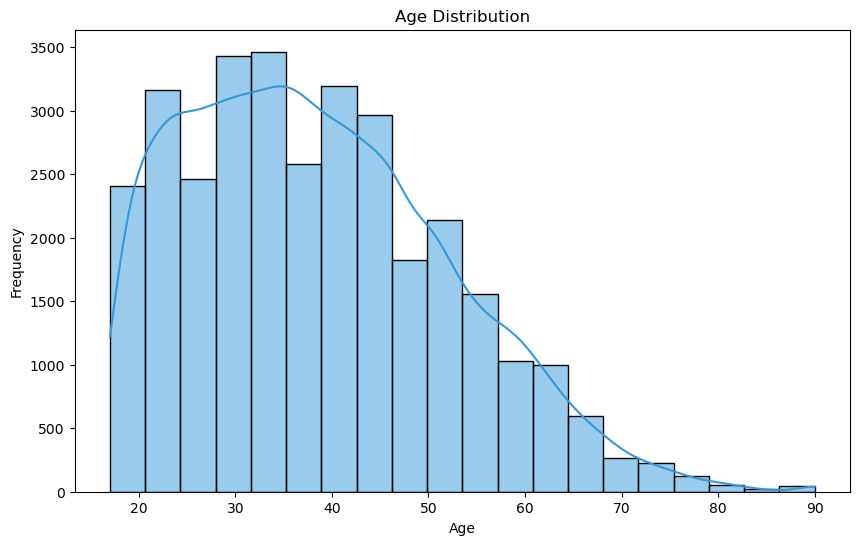

In [61]:
# Set color palette
primary_color = '#3498db'
secondary_color = '#2ecc71'
plt.figure(figsize=(10, 6))
sns.histplot(ad['age'], kde=True, color=primary_color, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


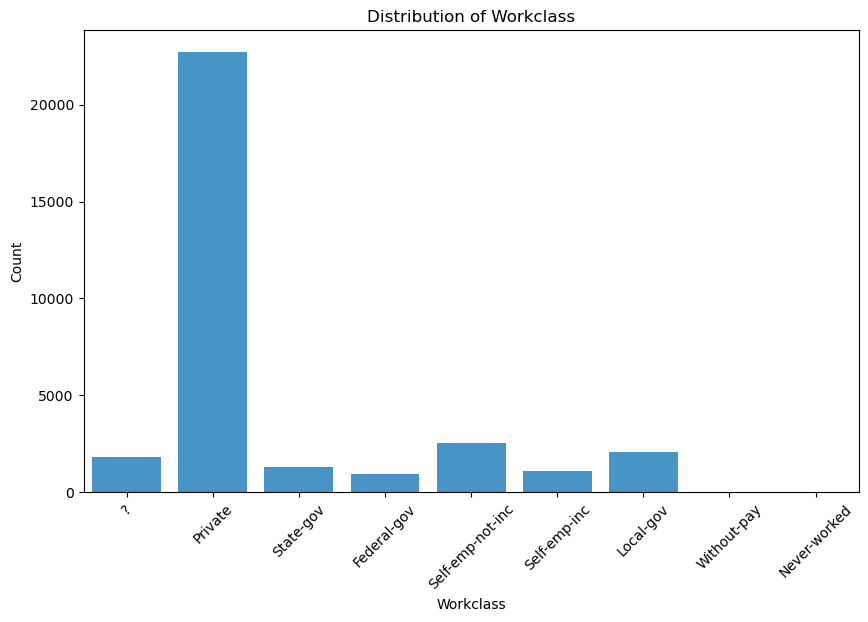

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(data=ad, x='workclass', color=primary_color)
plt.xticks(rotation=45)
plt.title('Distribution of Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.show()


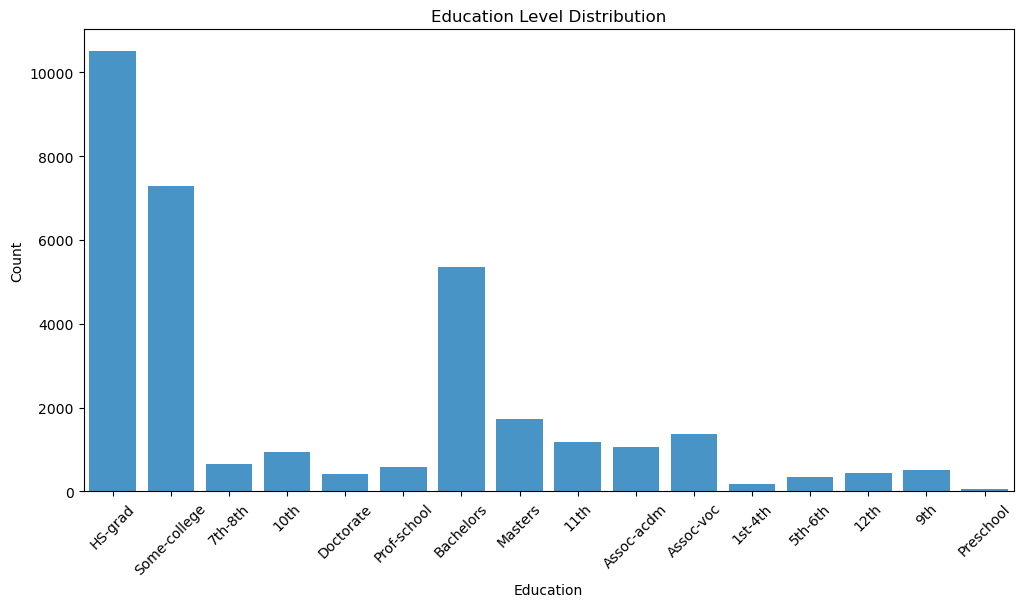

In [63]:
plt.figure(figsize=(12, 6))
sns.countplot(data=ad, x='education', color=primary_color)
plt.xticks(rotation=45)
plt.title('Education Level Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()


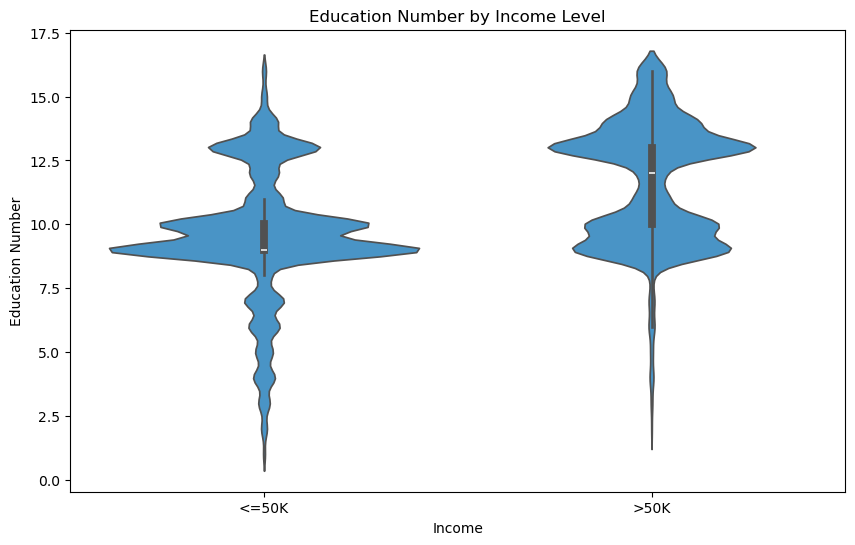

In [64]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=ad, x='income', y='education.num', color=primary_color)
plt.title('Education Number by Income Level')
plt.xlabel('Income')
plt.ylabel('Education Number')
plt.show()


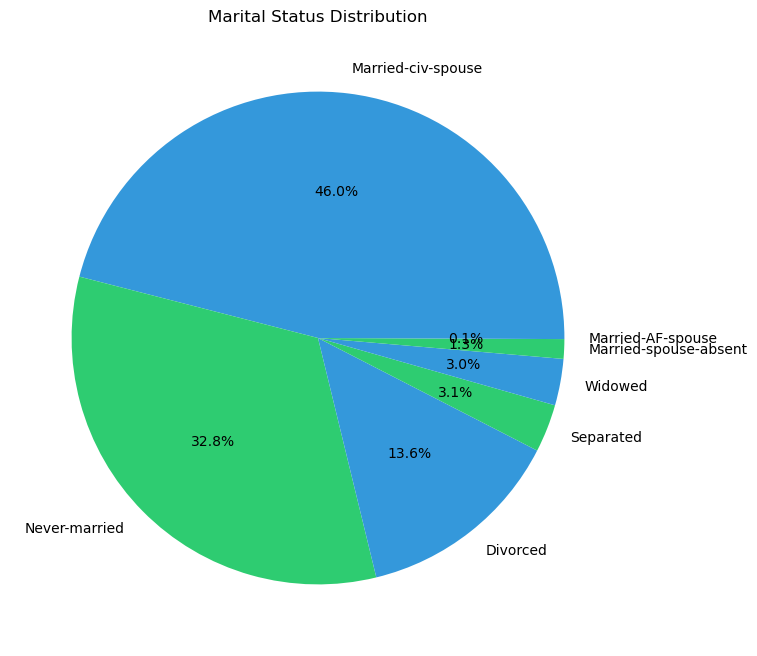

In [65]:
plt.figure(figsize=(8, 8))
ad['marital.status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=[primary_color, secondary_color])
plt.title('Marital Status Distribution')
plt.ylabel('')
plt.show()


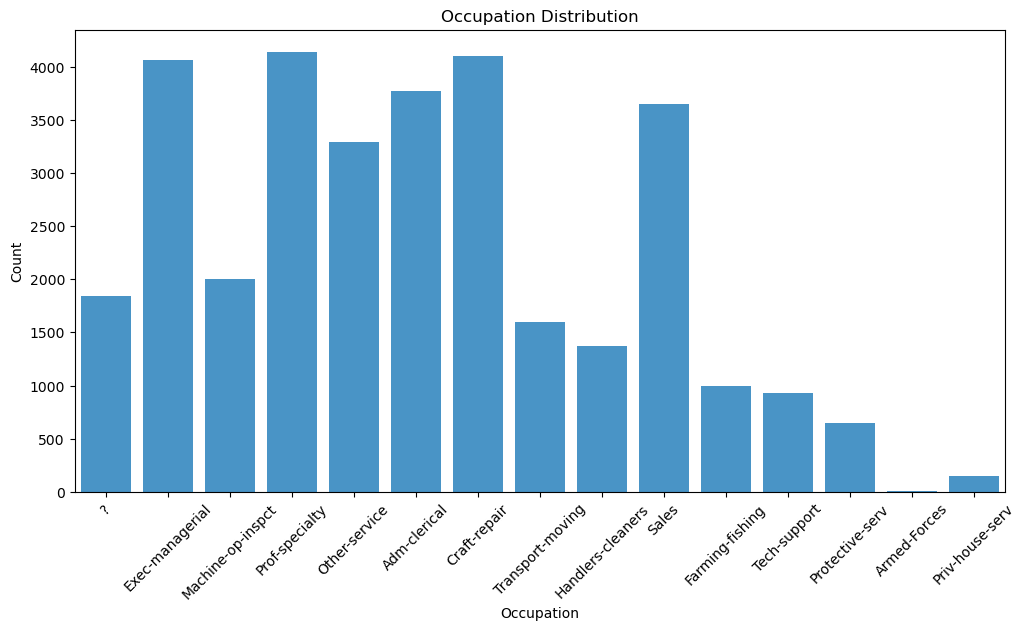

In [66]:
plt.figure(figsize=(12, 6))
sns.countplot(data=ad, x='occupation', color=primary_color)
plt.xticks(rotation=45)
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()


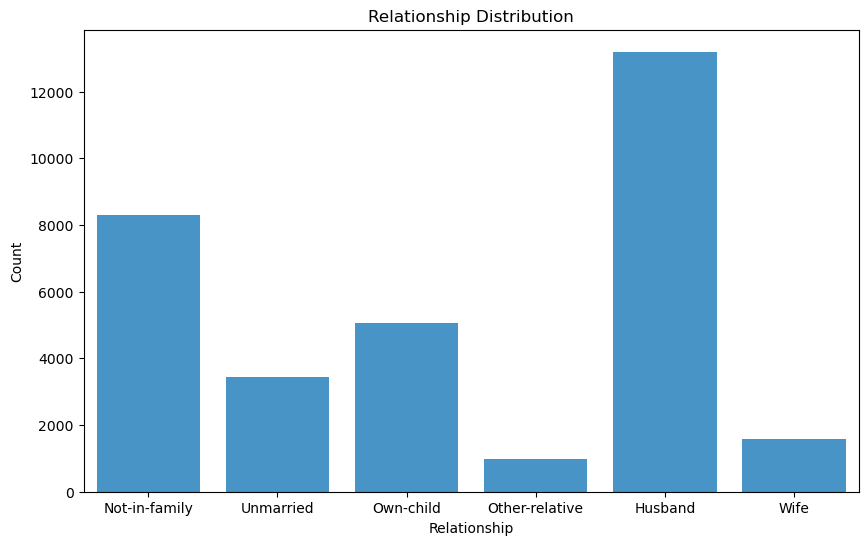

In [67]:
plt.figure(figsize=(10, 6))
sns.countplot(data=ad, x='relationship', color=primary_color)
plt.title('Relationship Distribution')
plt.xlabel('Relationship')
plt.ylabel('Count')
plt.show()


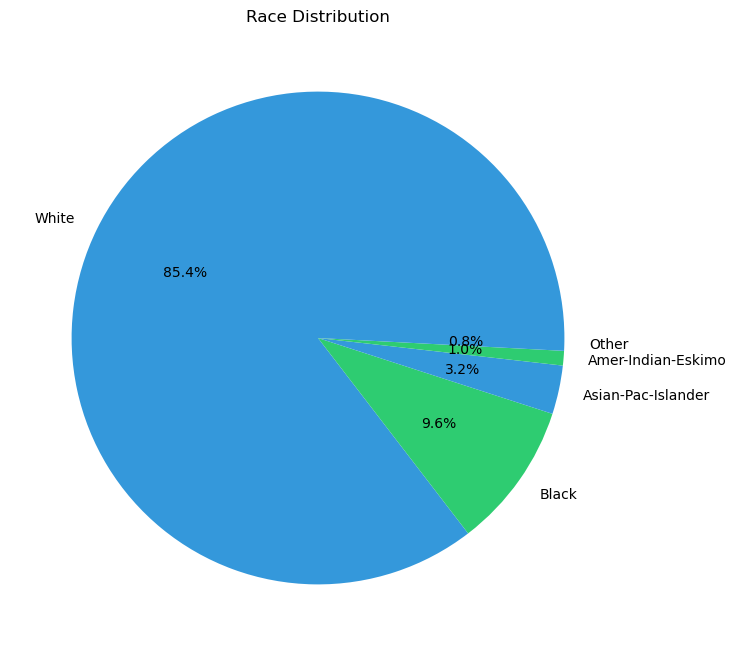

In [68]:
plt.figure(figsize=(8, 8))
ad['race'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=[primary_color, secondary_color])
plt.title('Race Distribution')
plt.ylabel('')
plt.show()


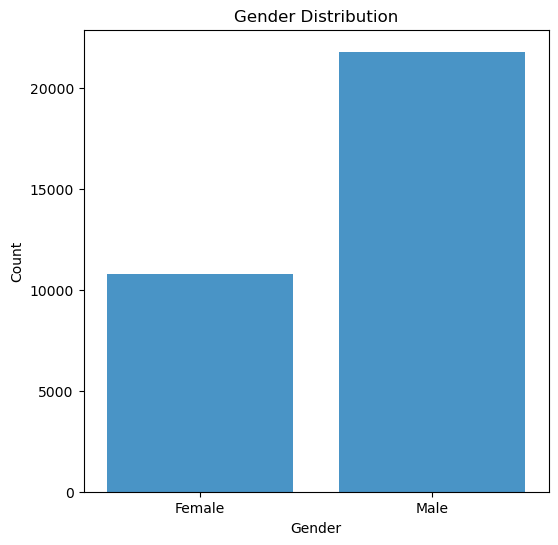

In [69]:
plt.figure(figsize=(6, 6))
sns.countplot(data=ad, x='sex', color=primary_color)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


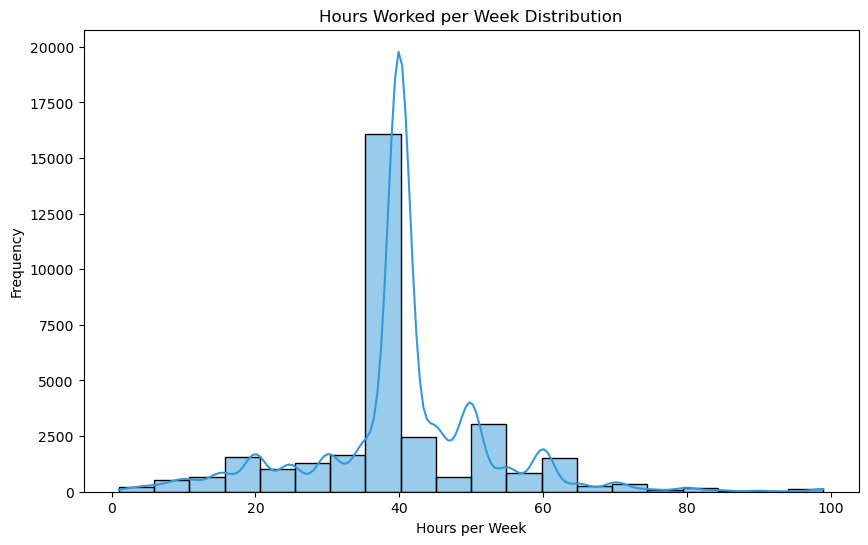

In [70]:
plt.figure(figsize=(10, 6))
sns.histplot(ad['hours.per.week'], kde=True, color=primary_color, bins=20)
plt.title('Hours Worked per Week Distribution')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.show()


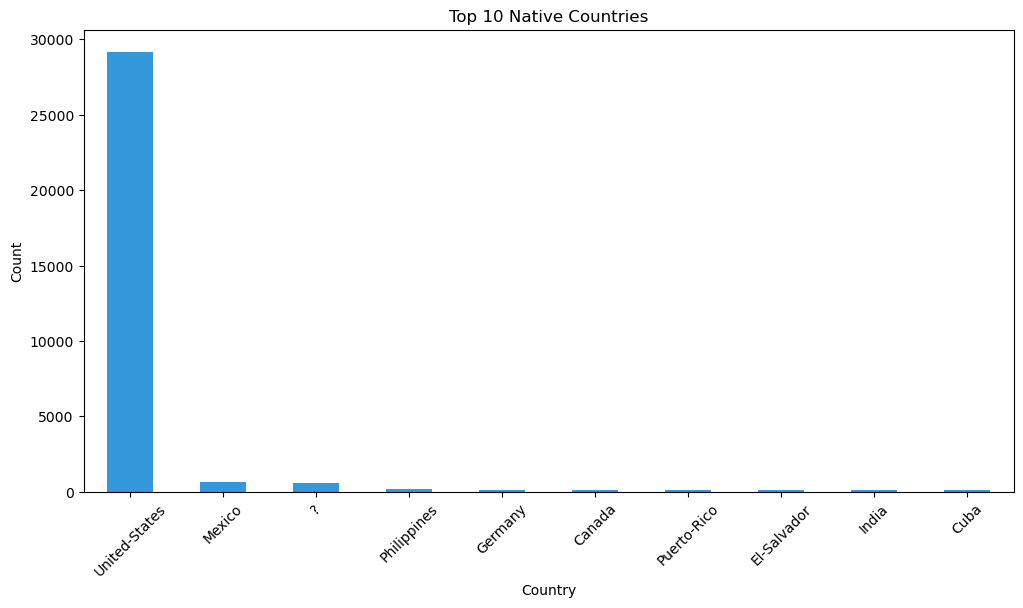

In [71]:
plt.figure(figsize=(12, 6))
ad['native.country'].value_counts().nlargest(10).plot(kind='bar', color=primary_color)
plt.title('Top 10 Native Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.show()


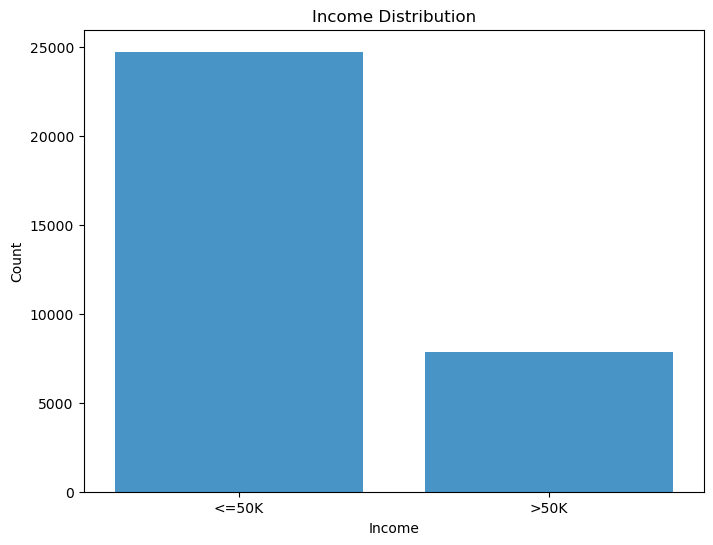

In [72]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ad, x='income', color=primary_color)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


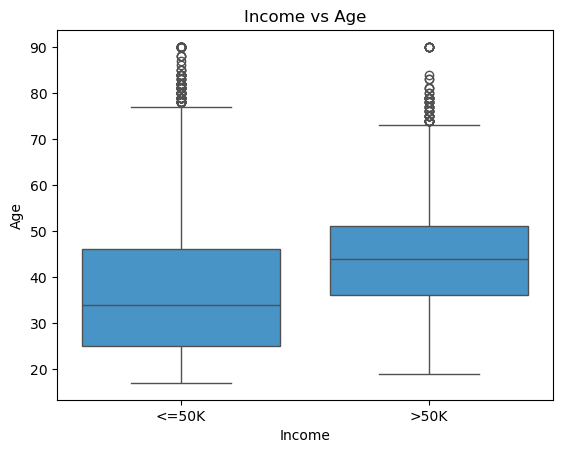

In [73]:
sns.boxplot(data=ad, x='income', y='age', color=primary_color)
plt.title('Income vs Age')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()


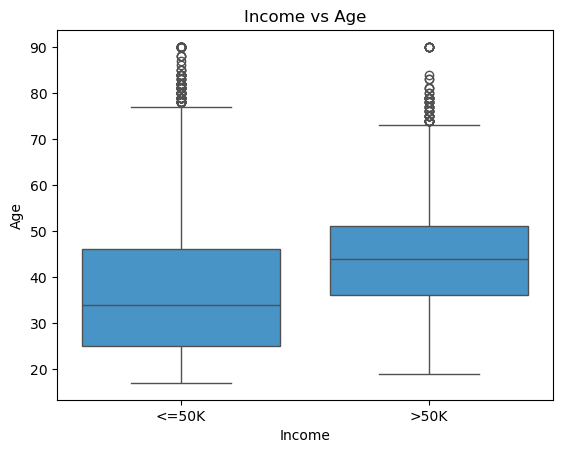

In [74]:
# Define primary color palette
primary_color = '#3498db'
secondary_color = '#2ecc71'
sns.boxplot(data=ad, x='income', y='age', color=primary_color)
plt.title('Income vs Age')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()


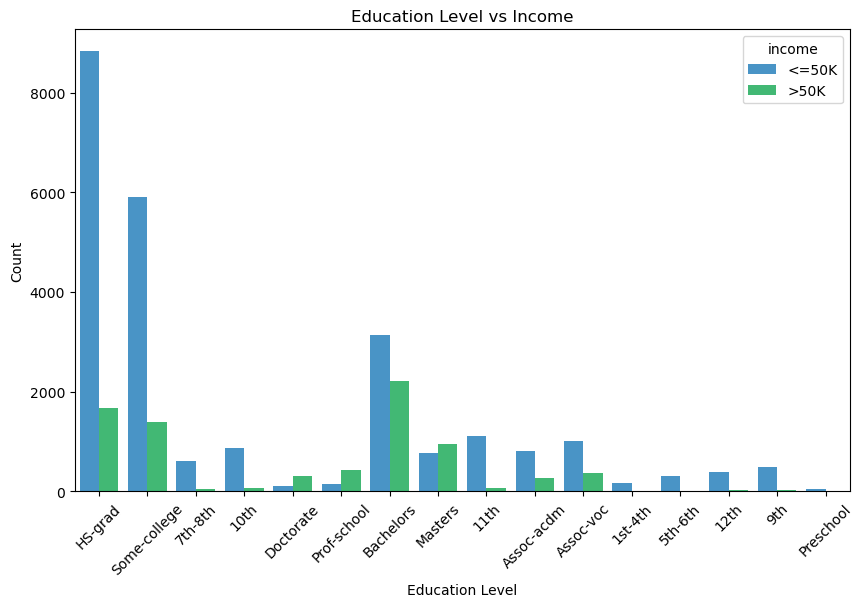

In [75]:
plt.figure(figsize=(10, 6))
sns.countplot(data=ad, x='education', hue='income', palette=[primary_color, secondary_color])
plt.xticks(rotation=45)
plt.title('Education Level vs Income')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


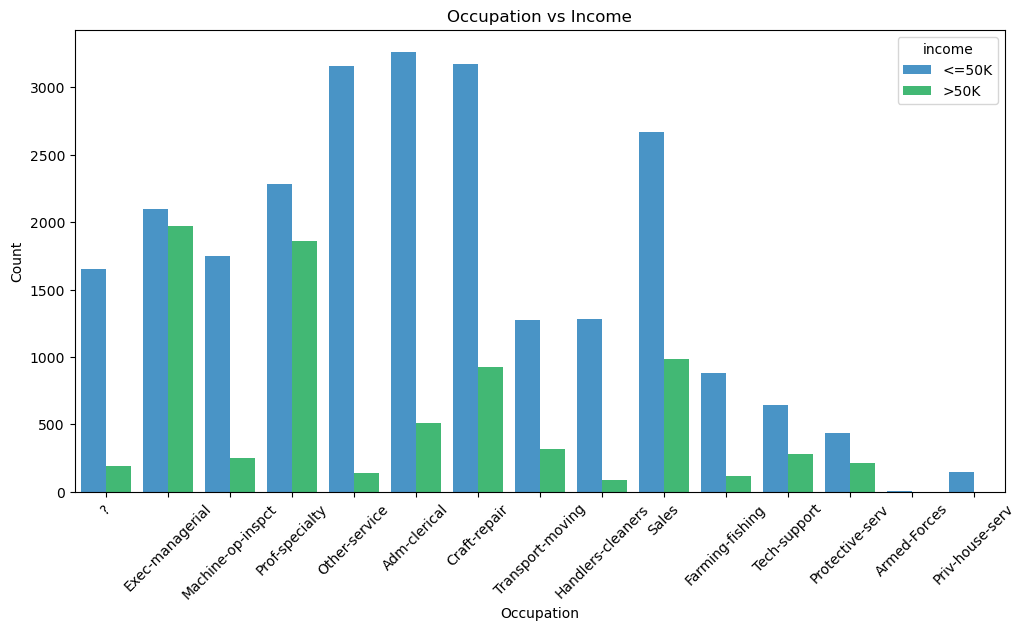

In [76]:
plt.figure(figsize=(12, 6))
sns.countplot(data=ad, x='occupation', hue='income', palette=[primary_color, secondary_color])
plt.xticks(rotation=45)
plt.title('Occupation vs Income')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()


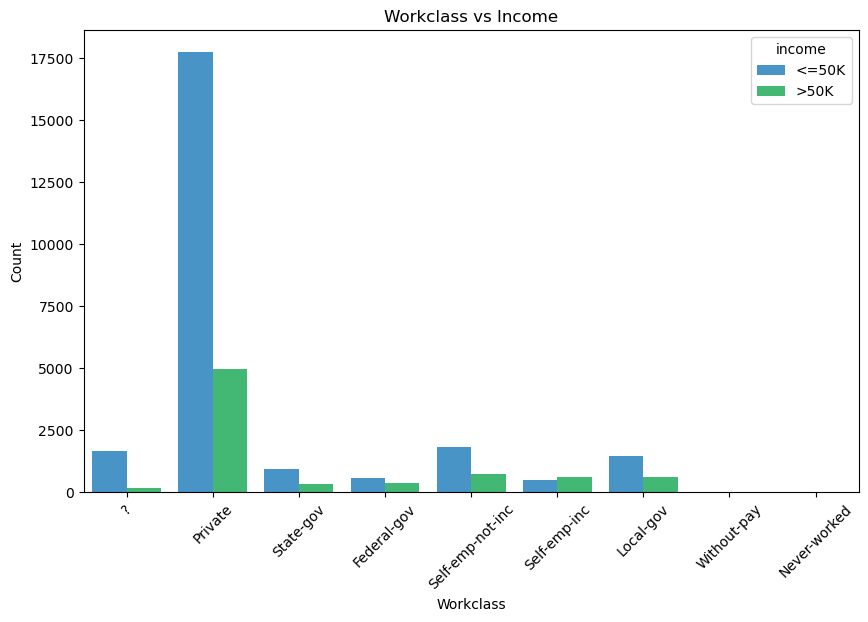

In [77]:
plt.figure(figsize=(10, 6))
sns.countplot(data=ad, x='workclass', hue='income', palette=[primary_color, secondary_color])
plt.xticks(rotation=45)
plt.title('Workclass vs Income')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.show()


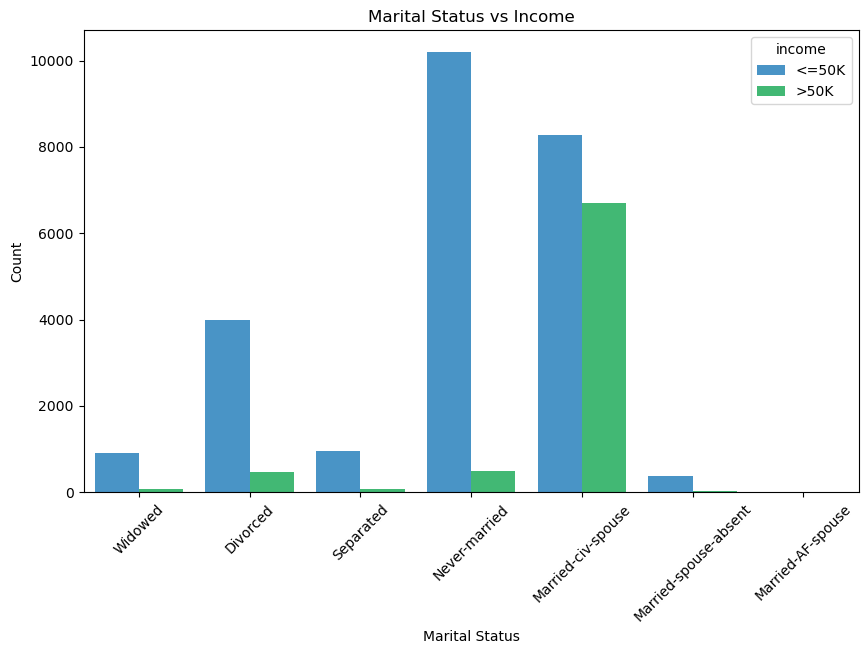

In [78]:
plt.figure(figsize=(10, 6))
sns.countplot(data=ad, x='marital.status', hue='income', palette=[primary_color, secondary_color])
plt.xticks(rotation=45)
plt.title('Marital Status vs Income')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


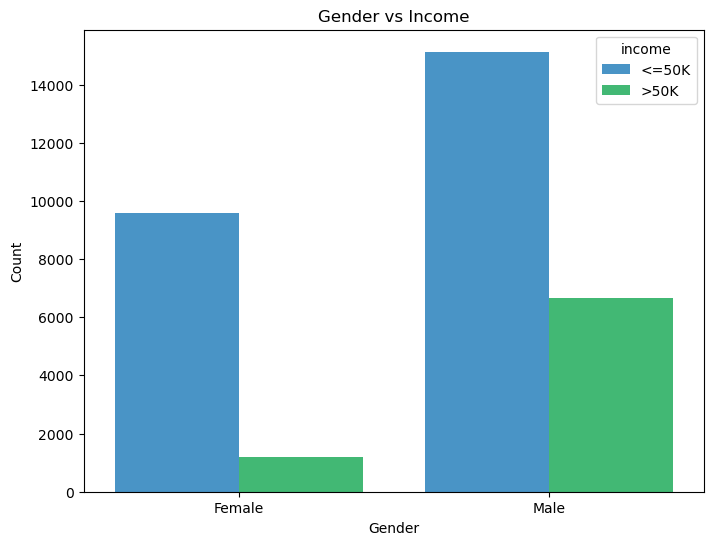

In [79]:
plt.figure(figsize=(8, 6))
sns.countplot(data=ad, x='sex', hue='income', palette=[primary_color, secondary_color])
plt.title('Gender vs Income')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


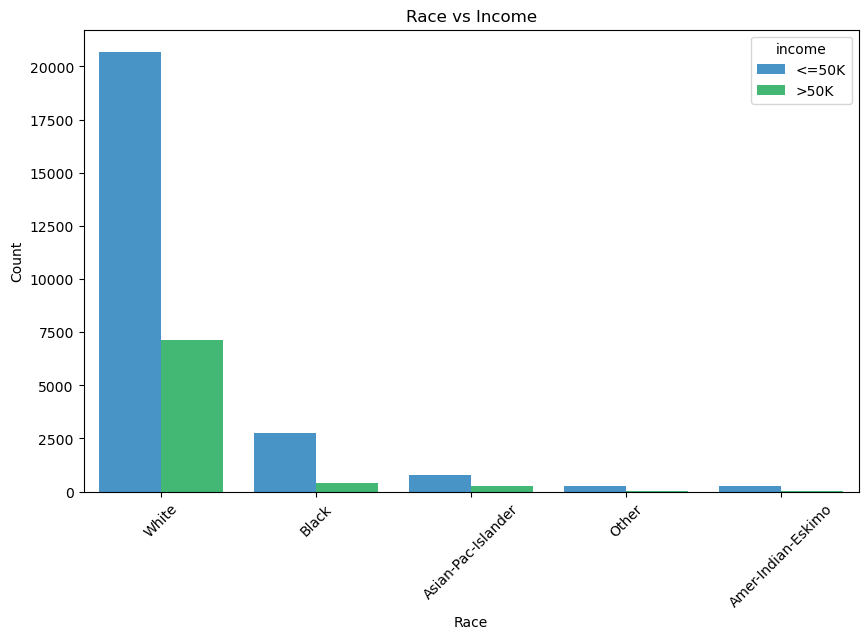

In [80]:
plt.figure(figsize=(10, 6))
sns.countplot(data=ad, x='race', hue='income', palette=[primary_color, secondary_color])
plt.xticks(rotation=45)
plt.title('Race vs Income')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()


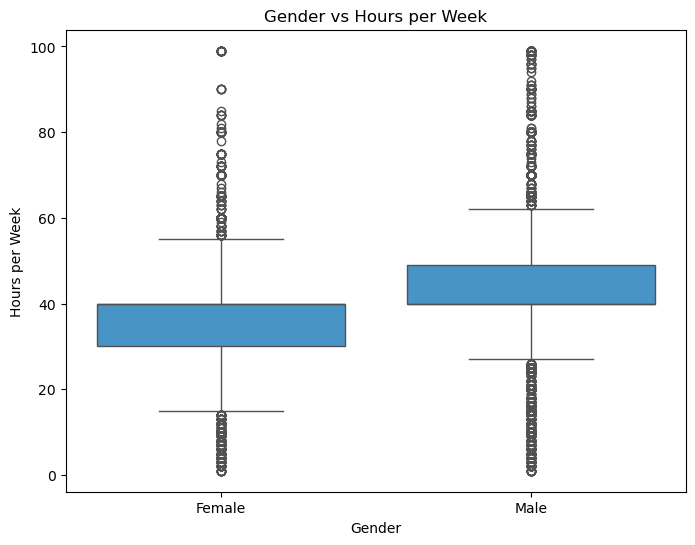

In [81]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=ad, x='sex', y='hours.per.week', color=primary_color)
plt.title('Gender vs Hours per Week')
plt.xlabel('Gender')
plt.ylabel('Hours per Week')
plt.show()


## PREDICTING INCOME LEVELS.

In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


##  Data Preprocessing
*Handle categorical variables and scale numeric features.*

In [83]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data
ad = pd.read_csv("adult.csv")

# Separate features and target variable
X = ad.drop('income', axis=1)
y = ad['income']

# Convert categorical columns using Label Encoding
categorical_cols = X.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

# Scale numerical columns
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [88]:
ad.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [90]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load data
ad = pd.read_csv("adult.csv")

# Separate features and target variable
X = ad.drop('income', axis=1)
y = ad['income']

# Convert categorical columns using Label Encoding
categorical_cols = X.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

# Scale numerical columns
scaler = StandardScaler()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [91]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

Logistic Regression Accuracy: 0.8238906801781053
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89      4976
        >50K       0.70      0.44      0.54      1537

    accuracy                           0.82      6513
   macro avg       0.77      0.69      0.72      6513
weighted avg       0.81      0.82      0.81      6513

Confusion Matrix:
 [[4688  288]
 [ 859  678]]


In [85]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8093044679871028
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      4976
        >50K       0.59      0.62      0.60      1537

    accuracy                           0.81      6513
   macro avg       0.74      0.74      0.74      6513
weighted avg       0.81      0.81      0.81      6513

Confusion Matrix:
 [[4323  653]
 [ 589  948]]


In [86]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8093044679871028
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      4976
        >50K       0.59      0.62      0.60      1537

    accuracy                           0.81      6513
   macro avg       0.74      0.74      0.74      6513
weighted avg       0.81      0.81      0.81      6513

Confusion Matrix:
 [[4323  653]
 [ 589  948]]


In [87]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.865806847842776
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.88      0.95      0.92      4976
        >50K       0.80      0.58      0.67      1537

    accuracy                           0.87      6513
   macro avg       0.84      0.77      0.79      6513
weighted avg       0.86      0.87      0.86      6513

Confusion Matrix:
 [[4751  225]
 [ 649  888]]


## Feature Importance Analysis

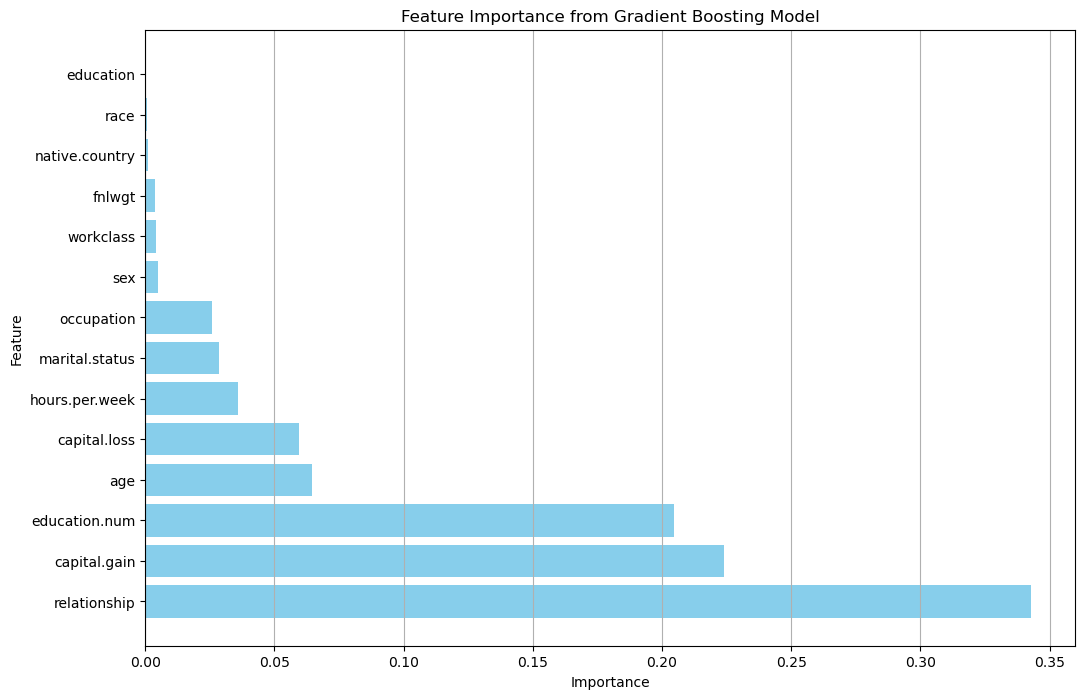

           Feature  Importance
7     relationship    0.342759
10    capital.gain    0.223953
4    education.num    0.204462
0              age    0.064503
11    capital.loss    0.059592
12  hours.per.week    0.035876
5   marital.status    0.028708
6       occupation    0.025777
9              sex    0.005034
1        workclass    0.004069
2           fnlwgt    0.003730
13  native.country    0.000955
8             race    0.000582
3        education    0.000000


In [93]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Get feature importance from the trained model
feature_importances = gb_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.title('Feature Importance from Gradient Boosting Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x')
plt.show()

# Print the sorted feature importances
print(feature_importance_df)


## Box Plots for Numerical Features
*Box plots shows the distribution of numerical features like age, capital.gain, capital.loss, and hours.per.week with respect to the income categories*

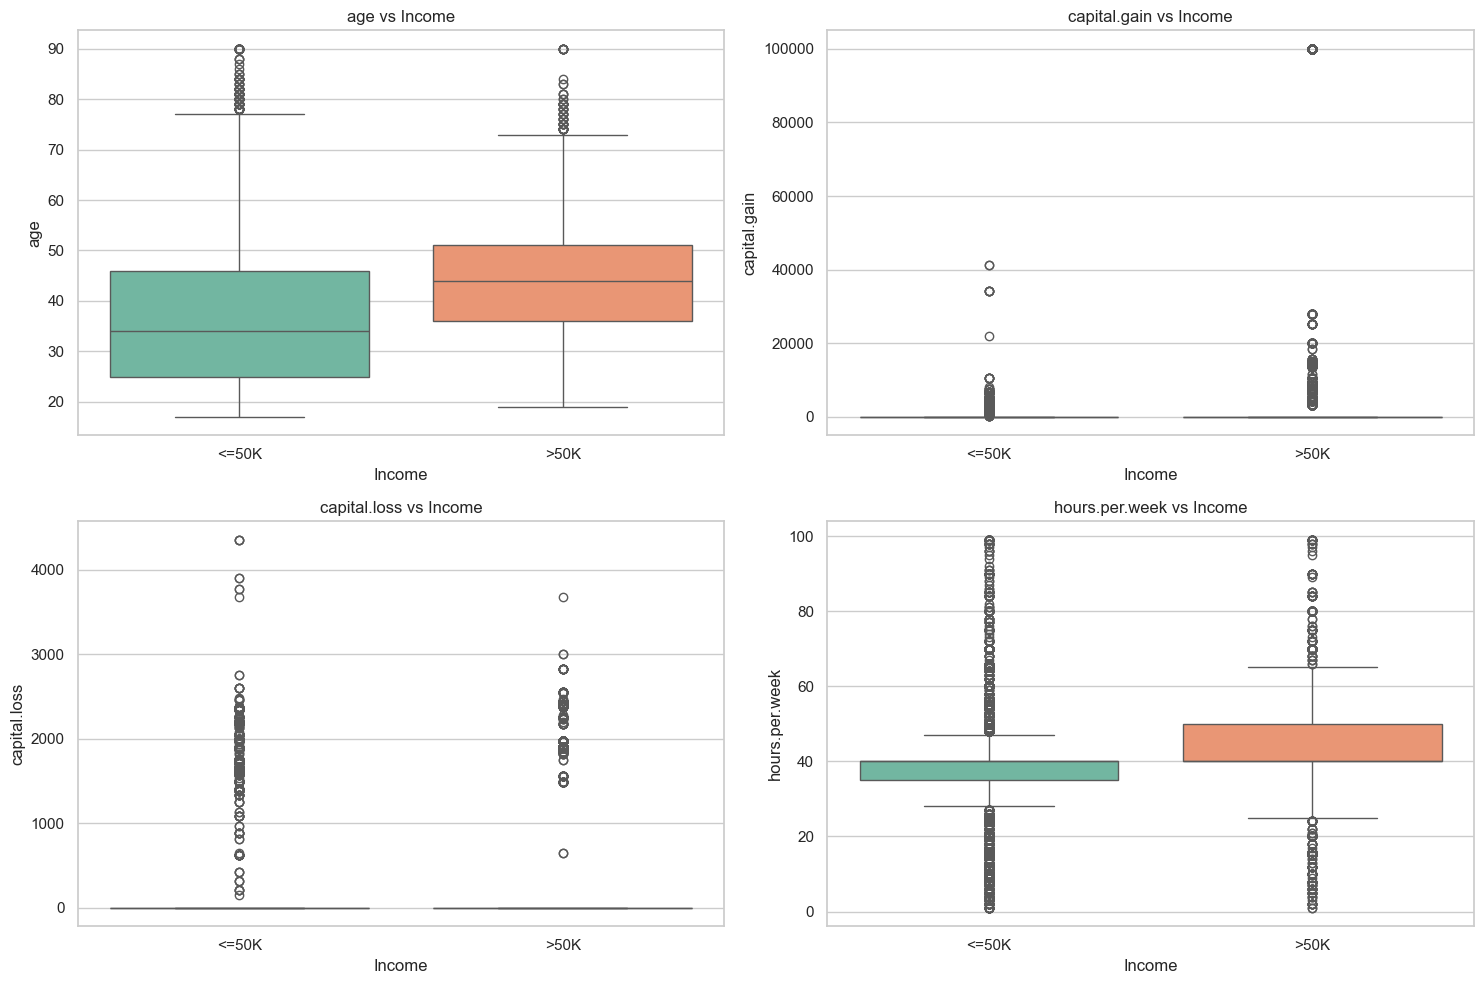

In [94]:
# Set the style for seaborn
sns.set(style="whitegrid")

# List of numerical features to visualize
numerical_features = ['age', 'capital.gain', 'capital.loss', 'hours.per.week']

# Create box plots for each numerical feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='income', y=feature, data=ad, palette="Set2")
    plt.title(f'{feature} vs Income')
    plt.xlabel('Income')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


## Count Plots for Categorical Features.

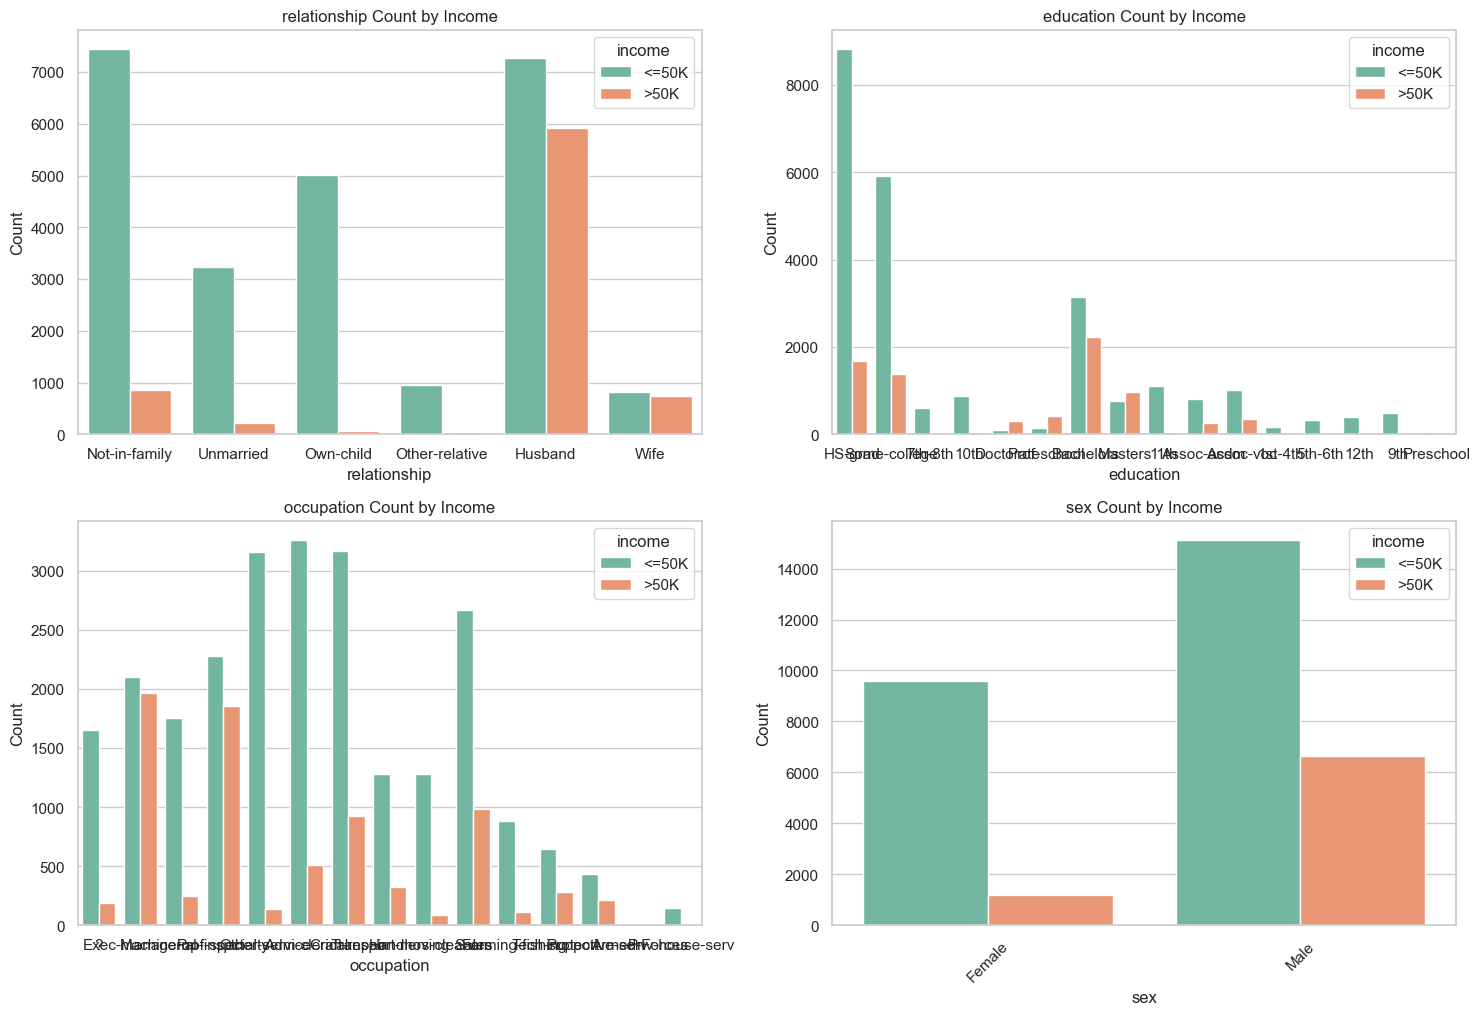

In [95]:
# List of categorical features to visualize
categorical_features = ['relationship', 'education', 'occupation', 'sex']

# Create count plots for each categorical feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=feature, hue='income', data=ad, palette="Set2")
    plt.title(f'{feature} Count by Income')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.xticks(rotation=45)  
plt.show()


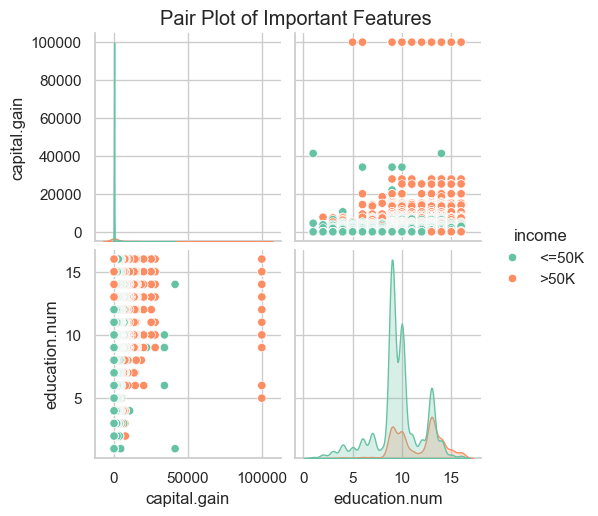

In [96]:
# Create a pair plot for the most important features
important_features = ['relationship', 'capital.gain', 'education.num', 'income']
sns.pairplot(ad[important_features], hue='income', palette="Set2")
plt.suptitle('Pair Plot of Important Features', y=1.02)  # Adjust title position
plt.show()
